In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.image as mpimg



sns.set()
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
data = pd.read_csv("../data/car_data.csv")
display(data.shape)
data.head()

(301, 9)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [4]:
data['petrol_car'] = np.where(data.Fuel_Type=="Petrol",1,0)
data['manual_transmission'] = np.where(data.Transmission=="Manual",1,0)
data['dealer_seller'] = np.where(data.Seller_Type=="Dealer",1,0)


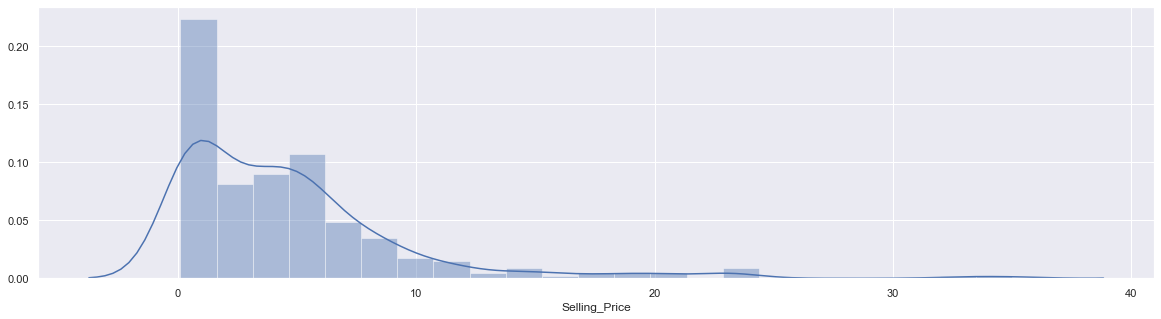

In [10]:
sns.distplot(data['Selling_Price'])

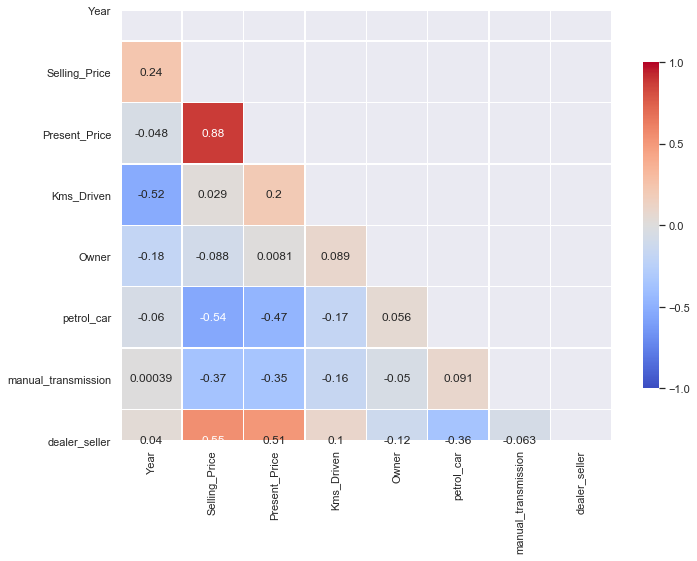

In [6]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(11, 15)) 
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

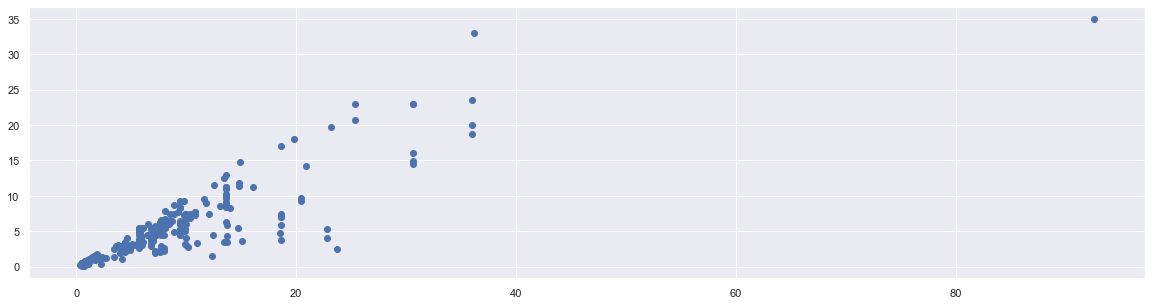

In [25]:
plt.scatter(data['Present_Price'],data['Selling_Price'])

In [ ]:

def linearity_test(model,X, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict(X)
    resids = fitted_vals - y.values
    resids = resids.reshape(1,-1)[0]

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals.reshape(1,-1)[0], y=y.values.reshape(1,-1)[0], lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals.reshape(1,-1)[0], y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
    


def plot_single_LR(X,y,ypred):


    # Plot regression against actual data
    plt.plot(X, ypred)     # regression line
    plt.plot(X, y, 'ro')   # scatter plot showing actual data
    plt.title('Actual vs Predicted')
    plt.xlabel('X')
    plt.ylabel('y')

    plt.show()

def evaluation_metrics(y,ypred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, ypred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y, ypred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, ypred)))
    print('R2--->', metrics.r2_score(y, ypred))


def lr_class(df,target_col,features):
    X = df[features]
    y = df[target_col]  
    
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    print ("\Parameters\n")
    print("Coefficients: ", lin_reg.coef_)
    print("Intercept: ", lin_reg.intercept_)

    ypred = lin_reg.predict(X)

    print ("\nMetrics\n")
    evaluation_metrics(y,ypred)
    linearity_test(lin_reg, X,y)    


## Single Linear Regression

\Parameters

Coefficients:  [[0.51684903]]
Intercept:  [0.71852747]

Metrics

Mean Absolute Error: 1.4778880466892328
Mean Squared Error: 5.855089487051356
Root Mean Squared Error: 2.4197292177124603
R2---> 0.7726103146985799


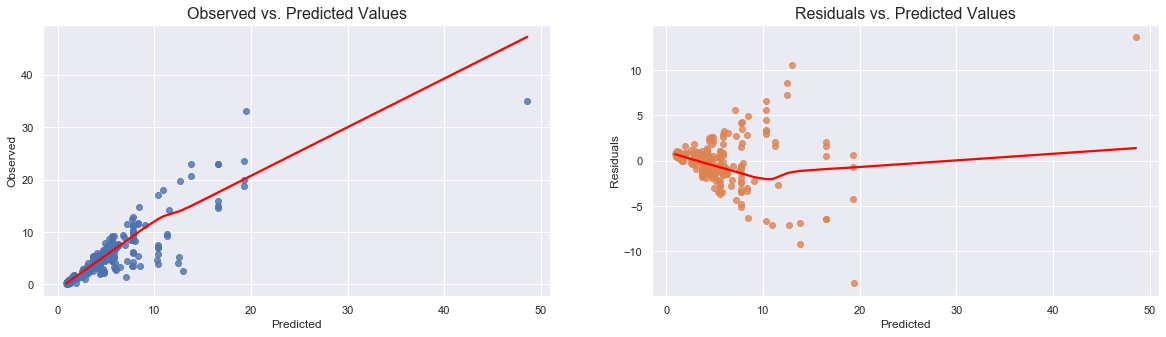

In [26]:
target_col = ['Selling_Price']
features = ['Present_Price']
lr_class(data,target_col,features)

## Multi Variable Regression Problem

\Parameters

Coefficients:  [[ 4.40327097e-01 -6.84980100e-06 -1.75740847e+00 -6.73122118e-01
  -1.44967737e+00  1.09634144e+00  3.96984575e-01]]
Intercept:  [-795.85260194]

Metrics

Mean Absolute Error: 1.1812741443168984
Mean Squared Error: 3.0622785113441306
Root Mean Squared Error: 1.7499367163826614
R2---> 0.8810726038364074


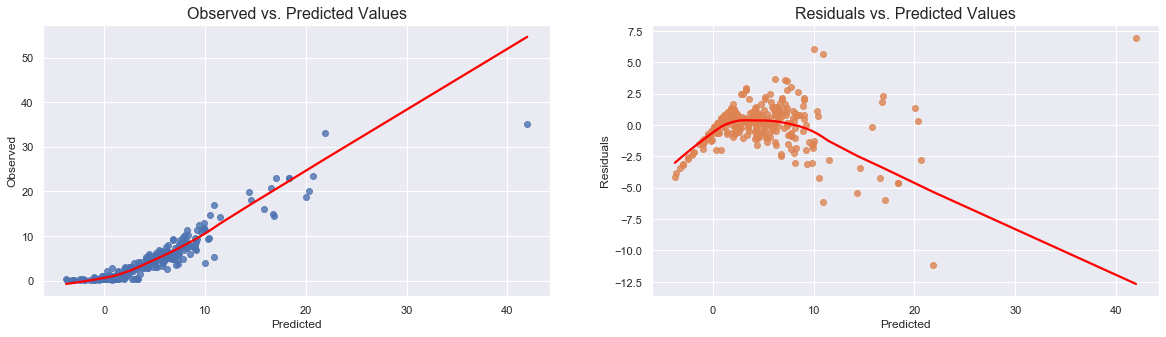

In [27]:
target_col = ['Selling_Price']
features = ['Present_Price','Kms_Driven','petrol_car','Owner','manual_transmission','dealer_seller','Year']

lr_class(data,target_col,features)

## Adding Non-Linearity

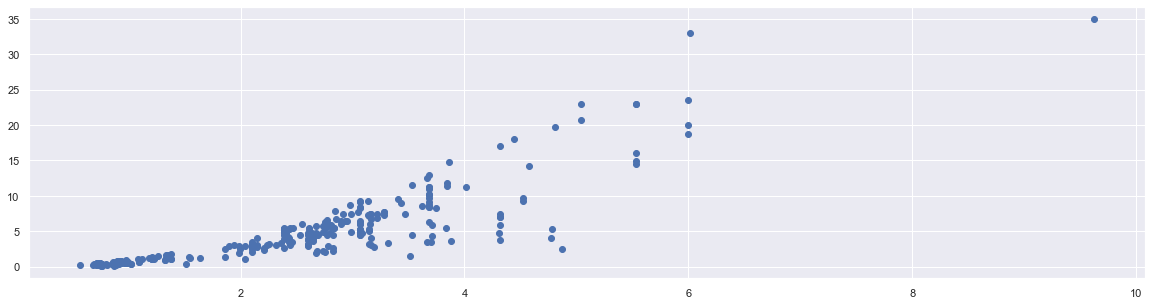

In [28]:
data['Present_Price_square'] = np.square(data['Present_Price'])  
data['Present_Price_sqrt'] = np.sqrt(data['Present_Price'])  
data['Present_Price_log'] = np.log(data['Present_Price'])  

plt.scatter(data['Present_Price_sqrt'],data[target_col])

\Parameters

Coefficients:  [[ 1.44519013e+00 -6.69443801e-06 -1.46553254e+00 -7.36484460e-01
  -6.50285074e-01  1.43600418e+00  3.91768713e-01  2.40527855e+00
  -6.09422272e-03 -6.68312307e+00]]
Intercept:  [-780.61373647]

Metrics

Mean Absolute Error: 1.137034432567725
Mean Squared Error: 2.717669126328696
Root Mean Squared Error: 1.6485354489147923
R2---> 0.8944559380764513


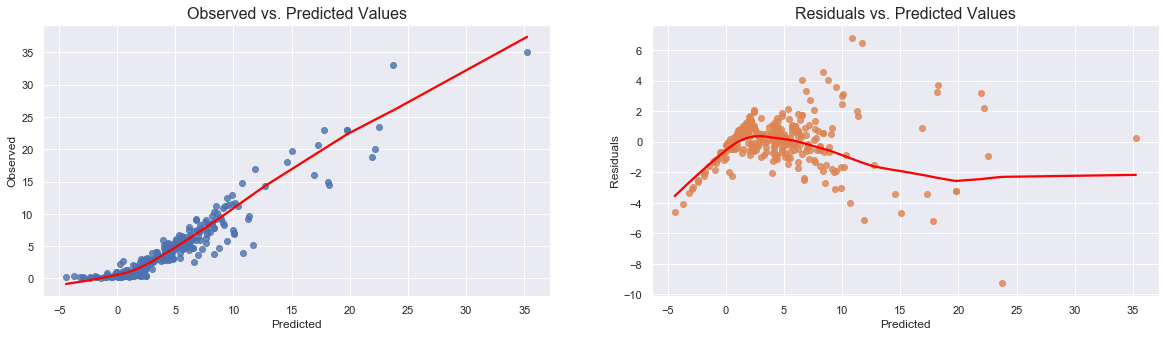

In [29]:
target_col = ['Selling_Price']
features = ['Present_Price','Kms_Driven','petrol_car','Owner','manual_transmission','dealer_seller','Year'] + ['Present_Price_log','Present_Price_square','Present_Price_sqrt']

lr_class(data,target_col,features)

## R2 - Calculation 

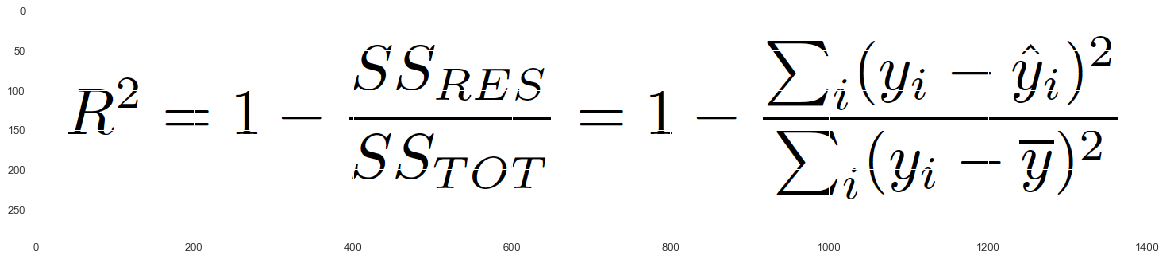

In [59]:
image = mpimg.imread("../img/r2.png")
plt.imshow(image)
plt.show()

In [60]:
X = data[['Present_Price']]
y = data[target_col]  
    
lin_reg = LinearRegression()
lin_reg.fit(X, y)
results  = data[target_col]

In [61]:
results['y'] = results['Selling_Price']
results['y_pred'] = lin_reg.predict(X)
results['y_avg'] = [results['y'].mean()]*len(results)

In [62]:
results.head()

,Selling_Price,y,y_pred,y_avg
0,3.35,3.35,3.607714,4.661296
1,4.75,4.75,5.649267,4.661296
2,7.25,7.25,5.809490,4.661296
3,2.85,2.85,2.863451,4.661296
4,4.60,4.60,4.269280,4.661296


In [63]:
results['error_square'] = np.square(results.y - results.y_pred)
results['error_avg_sqaure'] = np.square(results.y - results.y_avg)
results['residual'] = results.y - results.y_pred


In [64]:
print ("Mean Error" , results.error_avg_sqaure.sum())
print ("Model Error" , results.error_square.sum())
1 - results.error_square.sum()/results.error_avg_sqaure.sum()

Mean Error 7750.491994684386
Model Error 1762.3819356024583


0.7726103146985799

## Normality - Check

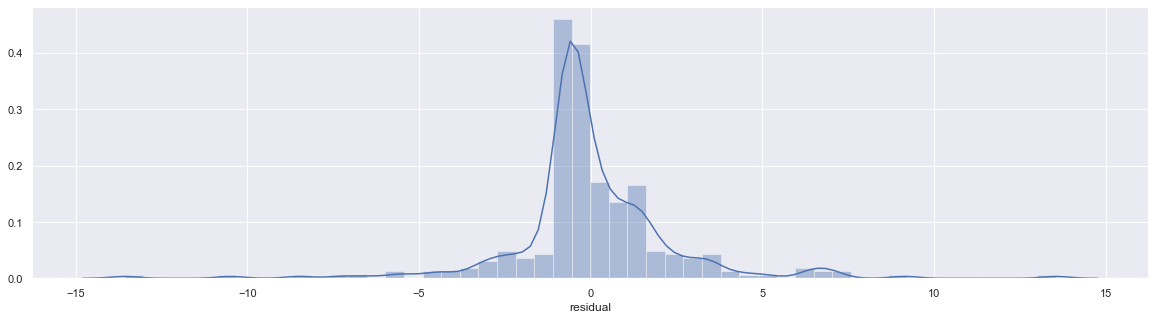

In [169]:
plt.tight_layout()
sns.distplot(results['residual'])

## p-value concept 

In [41]:
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           3.60e-98
Time:                        23:41:39   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
y = data[target_col]  

final_cols = ['Present_Price','Kms_Driven','petrol_car','Owner','manual_transmission','dealer_seller','Year'] + ['Present_Price_log','Present_Price_square','Present_Price_sqrt']
r2_values = []
adj_r2_values = []
col_cnt = []
for i in range(1,len(final_cols)+1):
    X = data[final_cols[:i]]
    
    model = sm.OLS(y, sm.add_constant(X))
    model_fit = model.fit()
    r2_values.append(model_fit.rsquared)
    adj_r2_values.append(model_fit.rsquared_adj)
    col_cnt.append(i)
    print ("columns cnt",i)




columns cnt 1
columns cnt 2
columns cnt 3
columns cnt 4
columns cnt 5
columns cnt 6
columns cnt 7
columns cnt 8
columns cnt 9
columns cnt 10


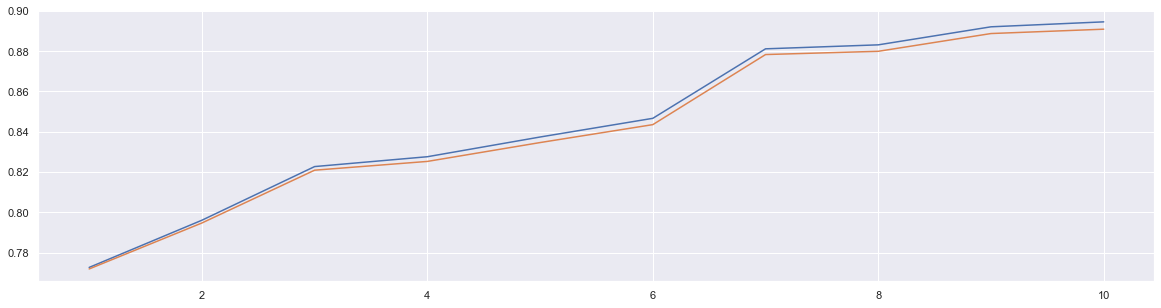

In [53]:
plt.plot(col_cnt, r2_values)
plt.plot(col_cnt, adj_r2_values)


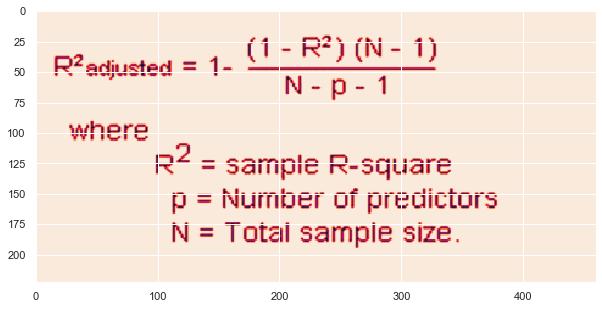

In [58]:
image = mpimg.imread("../img/adjusted_r2.png")
plt.imshow(image)
plt.show()